# 🤞 Submission file
Lets se if we have enough to prepare a submission file

In [1]:
import dataloader2
test_sid_files = dataloader2.test_sids_files()
test_sid_files

['data\\test_sids\\038441c925bb.parquet',
 'data\\test_sids\\03d92c9f6f8a.parquet',
 'data\\test_sids\\0402a003dae9.parquet']

## Examine Test Data

In [7]:
import pandas as pd

sid_f = test_sid_files[0]
df = pd.read_parquet(sid_f)
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df.shape

(150, 5)

In [8]:
df.head()

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14 19:30:00+00:00,2.6367,0.0217
1,038441c925bb,1,2018-08-14 19:30:05+00:00,2.6368,0.0215
2,038441c925bb,2,2018-08-14 19:30:10+00:00,2.6370,0.0216
3,038441c925bb,3,2018-08-14 19:30:15+00:00,2.6368,0.0213
4,038441c925bb,4,2018-08-14 19:30:20+00:00,2.6368,0.0215


In [9]:
df.tail()

,series_id,step,timestamp,anglez,enmo
145,038441c925bb,145,2018-08-14 19:42:05+00:00,-79.990601,0.0135
146,038441c925bb,146,2018-08-14 19:42:10+00:00,-80.028999,0.0136
147,038441c925bb,147,2018-08-14 19:42:15+00:00,-80.009300,0.0137
148,038441c925bb,148,2018-08-14 19:42:20+00:00,-80.066902,0.0135
149,038441c925bb,149,2018-08-14 19:42:25+00:00,-80.153503,0.0136


In [10]:
df['timestamp'].iloc[-1] - df['timestamp'].iloc[0]

Timedelta('0 days 00:12:25')

In [12]:
print("Test data interval")
for sid_f in test_sid_files:
    df = pd.read_parquet(sid_f)
    df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
    delta = df['timestamp'].iloc[-1] - df['timestamp'].iloc[0]
    print(f"\t{sid_f}: {delta}")

Test data interval
	data\test_sids\038441c925bb.parquet: 0 days 00:12:25
	data\test_sids\03d92c9f6f8a.parquet: 0 days 00:12:25
	data\test_sids\0402a003dae9.parquet: 0 days 00:12:25


## Predict on test data

In [2]:
from models.model1 import model, getXandIndex

In [13]:
sid_f = test_sid_files[0]
X, index = getXandIndex(sid_f)
X.shape, index.shape

((30, 2, 121), (30,))

In [14]:
y = model(X)
y.shape

TensorShape([30, 2])

In [29]:
import pandas as pd
data = pd.read_parquet(sid_f)
ts = data['timestamp']
ts = pd.to_datetime(ts, utc=True)
ts.shape

(150,)

In [30]:
tsi = ts.loc[index]
tsi.shape

(30,)

In [31]:
ts.head(1), ts.tail(1)

(0   2018-08-14 19:30:00+00:00
 Name: timestamp, dtype: datetime64[ns, UTC],
 149   2018-08-14 19:42:25+00:00
 Name: timestamp, dtype: datetime64[ns, UTC])

In [32]:
tsi.head(1), tsi.tail(1)

(60   2018-08-14 19:35:00+00:00
 Name: timestamp, dtype: datetime64[ns, UTC],
 89   2018-08-14 19:37:25+00:00
 Name: timestamp, dtype: datetime64[ns, UTC])

In [34]:
import visual
%matplotlib qt
anime = visual.scrol_predictions(y[:, 1], [0]*len(index), ts.loc[index], pd.Timedelta(1, 'min'))

  0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
from postprocess import smooth, tabulate
res = smooth(y[:, 1])
preds = tabulate(res, index, data)

In [41]:
y.shape

TensorShape([30, 2])

In [40]:
res.shape

(480,)

(0.0, 1.0)

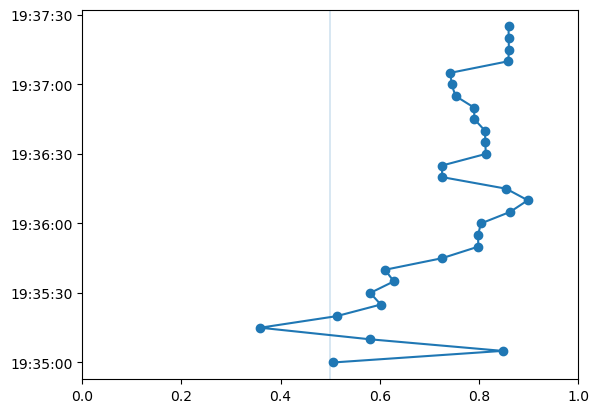

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(y[:, 1], tsi, 'o-')
plt.axvline(0.5, linewidth=0.25)
plt.xlim(0,1)

In [46]:
30/10

3.0

(0.0, 1.0)

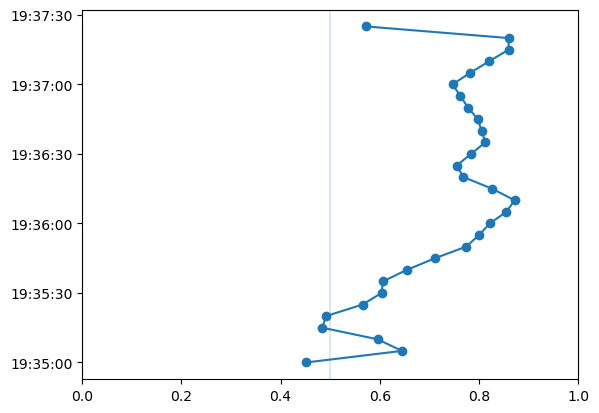

In [54]:
import numpy as np
n = 3 
res = np.convolve(y[:, 1], [1./n]*n, 'same')
plt.plot(res, tsi, 'o-')
plt.axvline(0.5, linewidth=0.25)
plt.xlim(0,1)

In [75]:

import matplotlib.animation as anim
%matplotlib qt
plt.figure()
plt.scatter(df['anglez'], df['timestamp'], c=np.log(df['enmo']+0.01))
def set_frame(ts):
    plt.ylim(ts-pd.Timedelta(1,'min'), ts+pd.Timedelta(1,'min'))
anime = anim.FuncAnimation(
    plt.gcf(),
    set_frame,
    df['timestamp']
)
anime.save("tmp.mp4")
plt.show()

C:\Users\rahul\AppData\Local\Temp\ipykernel_1764\606236165.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
